In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/facial-age-estimation
%pwd # .../facial-age-estimation 여야 정상

/content/drive/.shortcut-targets-by-id/1bvtrfzyZHNtEdmd4PS68jmpGT2RO5sOZ/facial-age-estimation


'/content/drive/.shortcut-targets-by-id/1bvtrfzyZHNtEdmd4PS68jmpGT2RO5sOZ/facial-age-estimation'

In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 51.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import sys
sys.path.append('./src')
sys.path.append('./src/train')
sys.path.append('./src/loader')

In [ ]:
# 1. 필수 모듈 임포트
from src.train.train_base_to_kor import (
    initialize_model,
    train_model,
    draw_plot
)
from src.loader.custom_dataset_dataloader_korean import get_data_loaders

# 2. 모델 초기화
model = initialize_model(checkpoint_path='./src/weights/legacy_weight.pt')

# 3. 데이터 로더 준비 (별도 구현 필요)
train_loader, valid_loader, _ = get_data_loaders()

# 4. 학습 실행
trained_model = train_model(model, train_loader, valid_loader)

# 5. 결과 시각화
draw_plot()

백본 가중치 성공적으로 로드됨


Epoch: 1/20       8%|█████▍                                                                | 12/153 [02:38<32:26, 13.80s/batch, loss=44.4, metric=31.8]

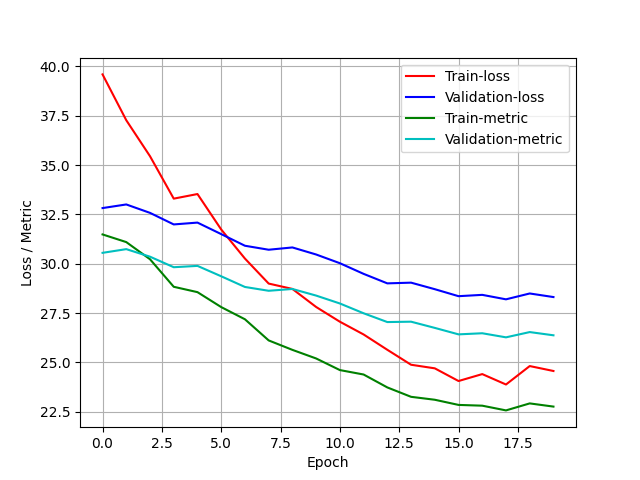

위 사진은 위 코드를 실행하면 생성되는 .png 파일이다.
위 코드를 로컬에서 실행하면 에폭 당 시간이 30\~40초이지만, 코랩에서 실행하면 에폭 당 시간이 40\~50분정도로, 에폭 당 시간 차이가 매우 큰 문제가 발생했다. 따라서 위와 같이 실행 결과를 첨부한다. 또한 위의 Loss는 60세 이상에 Loss를 3배 크게 부여하는 Adaptive Weighted MAE이기 때문에, 일반 MAE보다 값이 큰 것처럼 보일 수 있다. 실제 테스트셋으로 실험해보면 MAE가 7~8정도로 낮게 나오는 것을 확인할 수 있다.